import the dependencies

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and preprocessing

In [21]:
# <!--loading the csv file data to a pandas dataframe  -->
gold_data=pd.read_csv('gold.csv')

In [24]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [26]:
# print last the five rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [28]:
# number of rows and col
gold_data.shape

(2290, 6)

In [29]:
# getting some basic information about hte data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [31]:
# checking the numbetr of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [33]:
# statiscal data measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


finding the correlation 
1:positive corelation(directly proportional)
2:negative corelation(indirecctly proportional)


In [35]:
correlation=gold_data.corr()

C:\Users\hpw\AppData\Local\Temp\ipykernel_33488\361041759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

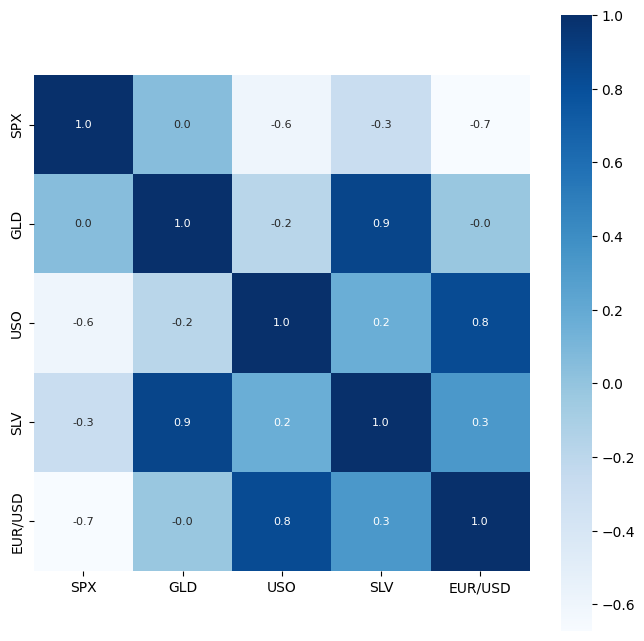

In [36]:
# costructing the heap map to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8}, cmap='Blues')

In [37]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\hpw\AppData\Local\Temp\ipykernel_33488\4144114338.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

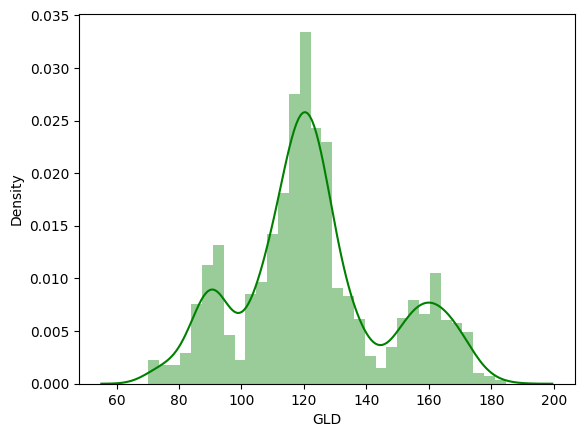

In [38]:
# checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

splitting the features and target

In [39]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [40]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [41]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [42]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training and testing data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model Training :
Random forest regression model
:ensemble model(model contains of more then one model joined together)
:decision tree

In [44]:
regressor = RandomForestRegressor(n_estimators=100)


In [45]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation 

In [46]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [47]:
print(test_data_prediction)

[168.60679894  81.98649992 115.88180027 127.61020105 120.70910155
 154.79579754 150.11349864 126.14059986 117.80019852 126.03200048
 116.66670072 171.85190093 141.44189813 167.75689804 115.12190018
 117.52840048 137.31040407 169.94940025 159.59500354 158.14739978
 155.11780067 125.22360029 176.44189982 157.2110039  125.18700078
  93.63599962  77.0810999  120.78209999 119.08579926 167.32669968
  88.10800056 125.3133      91.11330084 117.79899995 121.13139944
 136.30460074 115.61900149 114.97160086 147.61969987 107.14950095
 104.48620234  87.03169779 126.46260061 118.05350032 154.26199888
 119.61569994 108.31230029 108.04669834  93.10620056 127.25369755
  75.2595001  113.65759932 121.19550035 111.23149896 119.01369909
 120.57969918 158.84899956 168.31280108 147.03799725  85.75029894
  94.21190046  86.7514989   90.63089988 118.76640117 126.43580056
 127.48690045 168.81279963 122.39249936 117.34129884  98.38370006
 168.3327013  143.24639868 131.93220244 121.2984023  121.48119943
 119.91560

In [48]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989729276293389


In [49]:
# comparing using the graph 
# actual and predictted values
Y_test = list(Y_test)

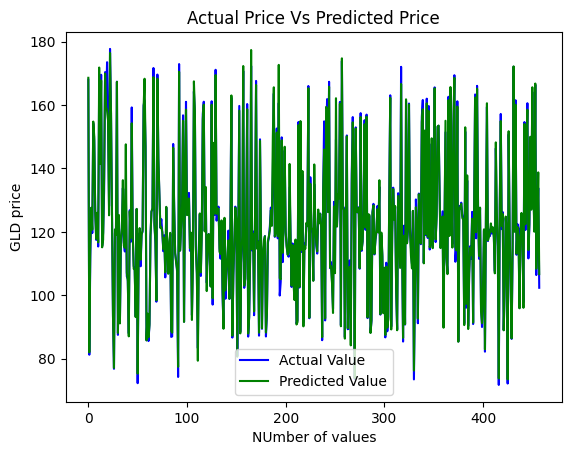

In [53]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('NUmber of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()